In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_coral_d18O(core_depth=100, temp_trend=-0.02, baseline_d18o=-5, location="Fake Coral Location", filename="simulated_d18o_dataset.csv"):
    """
    Generate a synthetic coral δ¹⁸O dataset with depth in mm.

    Parameters:
        core_depth (int): Total depth of the coral core in mm.
        temp_trend (float): The isotope warming trend (default -0.02 per mm).
        baseline_d18o (float): The baseline δ¹⁸O value.
        location (str): Name of the location for labeling.
        filename (str): Name of the file to save the dataset.

    Returns:
        df_d18o (DataFrame): DataFrame with Depth (mm) and δ¹⁸O values.
    """
    np.random.seed(42)  # Ensures reproducibility
    core_depth_values = np.arange(0, core_depth + 1, 1)  # Depth values from 0 to core_depth mm
    seasonal_cycle = np.sin(2 * np.pi * core_depth_values / 12)  # Simulated seasonal cycle
    noise = np.random.normal(0, 0.1, size=len(core_depth_values))  # Small noise

    # Apply the temperature trend to δ¹⁸O
    temp_effect = temp_trend * core_depth_values  # Decreasing temperature increases δ¹⁸O
    d18o_values = baseline_d18o + temp_effect + seasonal_cycle + noise  # Generate synthetic δ¹⁸O values

    # Create a dataframe
    df_d18o = pd.DataFrame({"Depth (mm)": core_depth_values, "δ18O (‰)": d18o_values})

    # Save to CSV
    df_d18o.to_csv(filename, index=False)

    # Plot the data
    plt.figure(figsize=(8, 5))
    plt.style.use('classic')
    plt.plot(core_depth_values, d18o_values, marker='o', linestyle='-', color='black', label='Simulated δ18O')
    plt.xlabel('Depth (mm)')
    plt.ylabel('δ18O (‰)')
    plt.title(f"Simulated δ¹⁸O Data - {location}")    
    plt.gca().invert_xaxis()  # Depth increases downward in time
    plt.grid()
    plt.legend()
    plt.show()

    return df_d18o

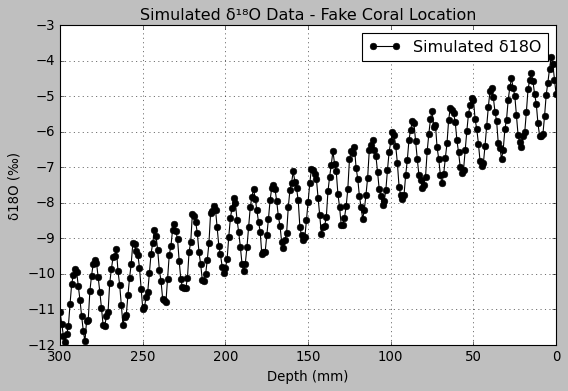

,Depth (mm),δ18O (‰)
0,0,-4.950329
1,1,-4.533826
2,2,-4.109206
3,3,-3.907697
4,4,-4.237390
...,...,...
296,296,-11.696065
297,297,-11.909270
298,298,-11.744739
299,299,-11.417037


In [16]:
generate_coral_d18O(core_depth = 300)


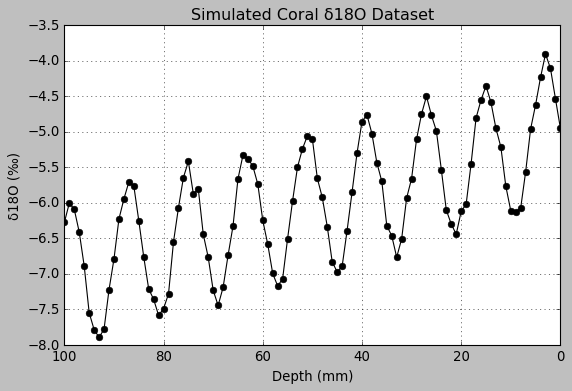

In [7]:
coral_df = generate_coral_d18O()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_sst_data(years=20, warming_trend=0.02, start_temp=28, location="Fake Coral Location", filename="simulated_sst_dataset.csv"):
    """
    Generate synthetic SST data over a given period with a warming trend.

    Parameters:
        years (int): Number of years of SST data.
        warming_trend (float): Temperature increase per year (°C).
        start_temp (float): Starting average SST (°C).
        location (str): Location name for the figure title.
        filename (str): Name of the CSV file to save the dataset.

    Returns:
        df (DataFrame): DataFrame with "Years Ago" and "SST (°C)".
    """
    
    # Generate date range for figure (2005-2025) and "years ago" format for dataset
    date_range = pd.date_range(start="2005-01-01", end="2025-12-01", freq='MS')
    years_ago = np.linspace(0, years, num=(years + 1) * 12)  # Monthly data
    
    # Generate seasonal SST variability (sinusoidal pattern)
    seasonal_variation = 1.0 * np.sin(2 * np.pi * date_range.month / 12)  # Annual cycle
    
    # Apply long-term warming trend
    sst_trend = warming_trend * (date_range.year - 2005)
    
    # Add noise for realism
    sst_noise = np.random.normal(0, 0.3, len(date_range))
    
    # Final SST values
    sst = start_temp + seasonal_variation + sst_trend + sst_noise
    
    # Create DataFrame
    df = pd.DataFrame({
        "Years Ago": years_ago,
        "SST (°C)": sst
    })
    
    # Save to CSV with the specified filename
    df.to_csv(filename, index=False)
    
    # Plot SST Data
    plt.figure(figsize=(10, 5))
    plt.style.use('classic')
    plt.plot(date_range, sst, marker='o', linestyle='-', color='black', label='Simulated SSTs')
    plt.xlabel("Year")
    plt.ylabel("SST (°C)")
    plt.title(f"Simulated SST Data - {location}")
    plt.ylim(26, 30)
    plt.grid()
    plt.legend()
    plt.show()
    
    return df

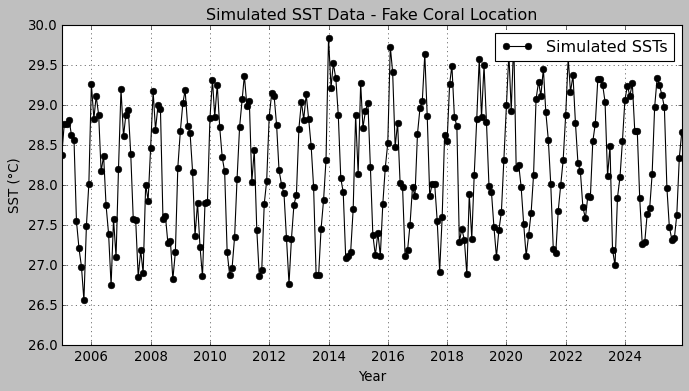

,Years Ago,SST (°C)
0,0.000000,28.373806
1,0.079681,28.763211
2,0.159363,28.759317
3,0.239044,28.817640
4,0.318725,28.621215
...,...,...
247,19.681275,27.318441
248,19.760956,27.335966
249,19.840637,27.627247
250,19.920319,28.342607


In [9]:
generate_sst_data()